In [2]:
#Name-Vipul Anand
#Project ID-DS2312
#Assignment-Restaurant Food Cost

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [33]:
data_train=pd.read_excel("C:\\Users\\vipul\\Downloads\\Data_Train (2).xlsx",sheet_name='Sheet1') #The training dataset
data_test=pd.read_excel("C:\\Users\\vipul\\Downloads\\Data_Test.xlsx",sheet_name='Sheet1') #The test dataset

In [34]:
#The train dataset
data_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [35]:
data_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [7]:
#here we can clearly see that the restaurant id is unique column and has all unique values so we must delete this in both datasets

In [36]:
data_train['RESTAURANT_ID'].value_counts()

RESTAURANT_ID
7264     8
4634     7
9910     6
11971    5
12747    5
        ..
9069     1
6573     1
7430     1
6381     1
6134     1
Name: count, Length: 11892, dtype: int64

In [37]:
data_train.drop(columns='RESTAURANT_ID',inplace=True) #dropiing the resturant id from the train dataset
data_test.drop(columns='RESTAURANT_ID',inplace=True) #Droping the resutant id from the test dataset

In [38]:
data_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [39]:
#Now let us first do the preprocessing of the Rating column
data_train['RATING'].value_counts()

RATING
3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: count, dtype: int64

In [40]:
#so here we can see that it has new and - values so we must remove it after that we can proceed with the preprocessing
data_train['RATING']=data_train['RATING'].replace(['NEW','-'],np.nan)
data_test['RATING']=data_train['RATING'].replace(['NEW','-'],np.nan)

In [41]:
data_train['RATING'].value_counts()

RATING
3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: count, dtype: int64

In [42]:
#Now we have to treat the null values which we have created
data_train['RATING']=data_train['RATING'].astype('float')
data_test['RATING']=data_test['RATING'].astype('float')

In [43]:
data_train['RATING']=data_train['RATING'].fillna(value=data_train['RATING'].mean())#The train dataset
data_test['RATING']=data_test['RATING'].fillna(value=data_test['RATING'].mean()) #the test dataset

In [44]:
data_train['RATING'].isna().sum()

0

In [45]:
data_test['RATING'].isna().sum()

0

In [33]:
#so we have succesfully treated all the null values

In [46]:
data_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [47]:
#now we must treat the votes column
data_train['VOTES'].value_counts()

VOTES
44 votes      71
29 votes      66
28 votes      66
38 votes      65
35 votes      64
              ..
1020 votes     1
4634 votes     1
2297 votes     1
1475 votes     1
1214 votes     1
Name: count, Length: 1847, dtype: int64

In [48]:
data_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [49]:
#We should remove the votes from the votes column which is in every row
data_train['VOTES']=data_train['VOTES'].str.replace('votes','')#for the train dataset
data_test['VOTES']=data_test['VOTES'].str.replace('votes','') #for the test dataset

In [54]:
data_train['VOTES']=data_train['VOTES'].astype('float') #For the train dataset
data_test['VOTES']=data_test['VOTES'].astype('float') #For the test dataset

In [55]:
data_train['VOTES']=data_train['VOTES'].fillna(value=data_train['VOTES'].mean()) #For the train dataset
data_test['VOTES']=data_test['VOTES'].fillna(value=data_test['VOTES'].mean())#For the test dataset

In [56]:
data_train['VOTES'].isna().sum()

0

In [57]:
data_test['VOTES'].isna().sum()

0

In [58]:
#so we can clearly see that we have removed the nulls of the rating and the votes column
data_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


In [59]:
#now let us do the encoding of the locality and the city column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data_train['CITY'].isna().sum()

112

In [60]:
data_test['CITY'].isna().sum()

35

In [62]:
#first let us treat the nulls afterwards we can encode
data_train['CITY']=data_train['CITY'].fillna(value=data_train['CITY'].mode()[0]) #for the train dataset
data_test['CITY']=data_test['CITY'].fillna(value=data_test['CITY'].mode()[0]) #for the test dataset

In [63]:
data_train['CITY'].isna().sum()

0

In [64]:
data_test['CITY'].isna().sum()

0

In [65]:
#now let us encode the values
data_train['CITY'].value_counts()

CITY
Chennai                                                                           2286
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1321
                                                                                  ... 
Gachibowli Hyderabad                                                                 1
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -       1
ECR NEELANKARAI Chennai 600115                                                       1
ward X11                                                                             1
Masab Tank                                                                           1
Name: count, Length: 359, dtype: int64

In [66]:
data_train['CITY']=lab_enc.fit_transform(data_train['CITY'])#For the train
data_test['CITY']=lab_enc.fit_transform(data_test['CITY'])#For the test

In [67]:
data_train['CITY'].value_counts()

CITY
67     2286
37     2149
131    1819
222    1722
252    1321
       ... 
111       1
62        1
98        1
358       1
212       1
Name: count, Length: 359, dtype: int64

In [68]:
data_test['CITY'].value_counts()

CITY
9      721
18     681
55     639
96     589
78     472
      ... 
136      1
97       1
123      1
82       1
114      1
Name: count, Length: 151, dtype: int64

In [70]:
data_train['LOCALITY'].value_counts()

LOCALITY
Gachibowli                 166
Indiranagar                138
Edappally                  122
Kakkanad                   121
HSR                        120
                          ... 
Huda Market                  1
OMR Road Sholinganallur      1
Telangana 500053             1
1st Lane                     1
Near Malviya Nagar           1
Name: count, Length: 1416, dtype: int64

In [71]:
data_train['LOCALITY']=lab_enc.fit_transform(data_train['LOCALITY'])
data_test['LOCALITY']=lab_enc.fit_transform(data_test['LOCALITY'])

In [72]:
data_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,3.6,49.0,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),67,1046,4.2,30.0,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,3.8,221.0,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),222,136,4.1,24.0,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),222,620,3.8,165.0,300


In [73]:
data_train['TITLE'].value_counts()

TITLE
QUICK BITES               4218
CASUAL DINING             3652
CAFÉ                       607
DESSERT PARLOR             382
CASUAL DINING,BAR          349
                          ... 
BAKERY,FOOD COURT            1
CLUB,MICROBREWERY            1
QUICK BITES,FOOD TRUCK       1
BAKERY,BEVERAGE SHOP         1
BAR,MICROBREWERY             1
Name: count, Length: 112, dtype: int64

In [74]:
data_test['TITLE'].value_counts()

TITLE
QUICK BITES                   1416
CASUAL DINING                 1258
CAFÉ                           223
DESSERT PARLOR                 126
CASUAL DINING,BAR              114
                              ... 
CASUAL DINING,LOUNGE             1
CLUB,FINE DINING                 1
SWEET SHOP,DESSERT PARLOR        1
COCKTAIL BAR,CASUAL DINING       1
BHOJANALYA                       1
Name: count, Length: 85, dtype: int64

In [75]:
#Since we can see that the values in this title column are 112 and 85 respectively so we can just use the labelencoder here
data_train['TITLE']=lab_enc.fit_transform(data_train['TITLE']) #for the train
data_test['TITLE']=lab_enc.fit_transform(data_test['TITLE']) #for the test

In [204]:
data_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,3.6,49.0,1200
1,33,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),67,1046,4.2,30.0,1500
2,31,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,3.8,221.0,800
3,94,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),222,136,4.1,24.0,800
4,50,Desserts,11am – 1am (Mon-Sun),222,620,3.8,165.0,300


In [76]:
data_test.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),110,662,3.6,564.0
1,74,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),96,221,4.2,61.0
2,23,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),96,411,3.8,350.0
3,85,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",41,456,4.1,1445.0
4,74,"South Indian, Kerala",11am – 10pm (Mon-Sun),78,300,3.8,23.0


In [77]:
#now comes the cuisines part
data_train['CUISINES'].value_counts()

CUISINES
South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, European, North Indian      1
Cafe, Continental, Italian, Lebanese            1
Finger Food, Continental, Asian, Chinese        1
Name: count, Length: 4155, dtype: int64

In [207]:
#the values in this column are way to high so we will just not use the label encoder instead of that we will figure out 
#something else

In [78]:
cuisines_mean_rating_train = data_train.groupby('CUISINES')['RATING'].mean()
cuisines_mean_rating_test= data_test.groupby('CUISINES')['RATING'].mean()


train_cuisines= data_train['CUISINES'].map(cuisines_mean_rating_train)
test_cuisines= data_test['CUISINES'].map(cuisines_mean_rating_test)

In [79]:
#here we have just grouped the common rows of the cuisines column together and have mapped in a column
#so we can now just use these values of the cuisines column
#And we know there might be multicollinerity issue between cuisines and the ratings we figure it out later on
data_train['CUISINES']=train_cuisines
data_test['CUISINES']=test_cuisines

In [80]:
data_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,3.600000,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,3.6,49.0,1200
1,33,4.200000,6pm – 11pm (Mon-Sun),67,1046,4.2,30.0,1500
2,31,3.900000,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,3.8,221.0,800
3,94,4.066667,11:30am – 1am (Mon-Sun),222,136,4.1,24.0,800
4,50,3.869905,11am – 1am (Mon-Sun),222,620,3.8,165.0,300


In [81]:
data_test.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,3.600000,12noon – 12midnight (Mon-Sun),110,662,3.6,564.0
1,74,4.200000,7am – 12:30AM (Mon-Sun),96,221,4.2,61.0
2,23,3.800000,11am – 11:30pm (Mon-Sun),96,411,3.8,350.0
3,85,3.821393,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",41,456,4.1,1445.0
4,74,4.000000,11am – 10pm (Mon-Sun),78,300,3.8,23.0


In [82]:
#Now the only column left for preprocessing is the time column
data_train['TIME'].value_counts()

TIME
11am – 11pm (Mon-Sun)                                 1415
12noon – 12midnight (Mon-Sun)                          469
12noon – 11pm (Mon-Sun)                                407
11am – 12midnight (Mon-Sun)                            310
10am – 10pm (Mon-Sun)                                  221
                                                      ... 
10am – 10pm (Mon-Fri),8:30am – 10pm (Sat-Sun)            1
12noon – 3:30pm, 6pm – 10:30pm (Mon-Thu),12noon...       1
12noon – 5:30pm, 7pm – 11pm (Mon-Sun)                    1
12midnight – 11:45pm (Mon-Sun)                           1
12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...          1
Name: count, Length: 2689, dtype: int64

In [83]:
data_train['START_TIME']=data_train['TIME'].str.split('–').str[0] 
data_test['START_TIME']=data_test['TIME'].str.split('–').str[0]

In [84]:
data_train

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,START_TIME
0,31,3.600000,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,3.6,49.0,1200,11am
1,33,4.200000,6pm – 11pm (Mon-Sun),67,1046,4.2,30.0,1500,6pm
2,31,3.900000,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,3.8,221.0,800,11am
3,94,4.066667,11:30am – 1am (Mon-Sun),222,136,4.1,24.0,800,11:30am
4,50,3.869905,11am – 1am (Mon-Sun),222,620,3.8,165.0,300,11am
...,...,...,...,...,...,...,...,...,...
12685,94,3.800000,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,342,3.8,546.0,500,12noon
12686,33,4.300000,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,133,4.3,1214.0,1800,12noon
12687,71,4.000000,12noon – 12:30AM (Mon-Sun),239,1342,4.0,608.0,1300,12noon
12688,31,3.800000,6am – 10:45pm (Mon-Sun),67,631,3.5,32.0,400,6am


In [ ]:
#WE have divided the time in start and now we will have to divide it into end also


In [85]:
end=data_train['TIME'].str.split('–').str[1] 

In [86]:
END=end.str.split(',').str[0]

In [87]:
data_train['END_TIME']=END.str.split('(').str[0]

In [88]:
data_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,START_TIME,END_TIME
0,31,3.600000,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,3.6,49.0,1200,11am,4pm
1,33,4.200000,6pm – 11pm (Mon-Sun),67,1046,4.2,30.0,1500,6pm,11pm
2,31,3.900000,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,3.8,221.0,800,11am,3:30pm
3,94,4.066667,11:30am – 1am (Mon-Sun),222,136,4.1,24.0,800,11:30am,1am
4,50,3.869905,11am – 1am (Mon-Sun),222,620,3.8,165.0,300,11am,1am


In [89]:
#Now doing the same for the test dataset
end=data_test['TIME'].str.split('–').str[1] 
END=end.str.split(',').str[0]
data_test['END_TIME']=END.str.split('(').str[0]
data_test.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,START_TIME,END_TIME
0,23,3.600000,12noon – 12midnight (Mon-Sun),110,662,3.6,564.0,12noon,12midnight
1,74,4.200000,7am – 12:30AM (Mon-Sun),96,221,4.2,61.0,7am,12:30AM
2,23,3.800000,11am – 11:30pm (Mon-Sun),96,411,3.8,350.0,11am,11:30pm
3,85,3.821393,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",41,456,4.1,1445.0,9am,10pm
4,74,4.000000,11am – 10pm (Mon-Sun),78,300,3.8,23.0,11am,10pm


In [90]:
end=data_test['TIME'].str.split('–').str[1] 
END=end.str.split(',').str[0]

In [91]:
data_test['OPENED_DAYS']=data_test['TIME'].str.split('–').str[1].str.split('(').str[1].str.split(')').str[0]

In [92]:
data_train['OPENED_DAYS']=data_train['TIME'].str.split('–').str[1].str.split('(').str[1].str.split(')').str[0]

In [93]:
#so finally we have concluded the encoding steps
#We can now delete the time column from both of out datasets
data_train.drop(columns='TIME',inplace=True)
data_test.drop(columns='TIME',inplace=True)

In [94]:
data_train.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,START_TIME,END_TIME,OPENED_DAYS
0,31,3.600000,320,285,3.6,49.0,1200,11am,4pm,NaN
1,33,4.200000,67,1046,4.2,30.0,1500,6pm,11pm,Mon-Sun
2,31,3.900000,67,1101,3.8,221.0,800,11am,3:30pm,NaN
3,94,4.066667,222,136,4.1,24.0,800,11:30am,1am,Mon-Sun
4,50,3.869905,222,620,3.8,165.0,300,11am,1am,Mon-Sun


In [95]:
#now let us delete the null values
data_train.isna().sum()

TITLE             0
CUISINES          0
CITY              0
LOCALITY          0
RATING            0
VOTES             0
COST              0
START_TIME        0
END_TIME        239
OPENED_DAYS    2153
dtype: int64

In [96]:
#There are nulls in the start and end time
data_train['START_TIME']=data_train['START_TIME'].fillna(data_train['START_TIME'].mode()[0])

In [97]:
data_train['START_TIME']=data_train['START_TIME'].fillna(data_train['START_TIME'].mode()[0])

In [98]:
data_train['OPENED_DAYS']=data_train['OPENED_DAYS'].fillna(data_train['OPENED_DAYS'].mode()[0])
data_test['OPENED_DAYS']=data_test['OPENED_DAYS'].fillna(data_test['OPENED_DAYS'].mode()[0])

In [99]:
data_test['END_TIME']=data_test['END_TIME'].fillna(data_test['END_TIME'].mode()[0])
data_train['END_TIME']=data_train['END_TIME'].fillna(data_train['END_TIME'].mode()[0])

In [100]:
data_train.isna().sum()

TITLE          0
CUISINES       0
CITY           0
LOCALITY       0
RATING         0
VOTES          0
COST           0
START_TIME     0
END_TIME       0
OPENED_DAYS    0
dtype: int64

In [101]:
data_test.isna().sum()

TITLE          0
CUISINES       0
CITY           0
LOCALITY       0
RATING         0
VOTES          0
START_TIME     0
END_TIME       0
OPENED_DAYS    0
dtype: int64

In [102]:
data_train.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,START_TIME,END_TIME,OPENED_DAYS
0,31,3.600000,320,285,3.6,49.0,1200,11am,4pm,Mon-Sun
1,33,4.200000,67,1046,4.2,30.0,1500,6pm,11pm,Mon-Sun
2,31,3.900000,67,1101,3.8,221.0,800,11am,3:30pm,Mon-Sun
3,94,4.066667,222,136,4.1,24.0,800,11:30am,1am,Mon-Sun
4,50,3.869905,222,620,3.8,165.0,300,11am,1am,Mon-Sun


In [292]:
#some things are still left which are the encoding of the start end and the opened days

In [103]:
data_test['START_TIME']=lab_enc.fit_transform(data_test['START_TIME'])
data_train['START_TIME']=lab_enc.fit_transform(data_train['START_TIME'])

In [104]:
data_test['END_TIME']=lab_enc.fit_transform(data_test['END_TIME'])
data_train['END_TIME']=lab_enc.fit_transform(data_train['END_TIME'])

In [105]:
data_test['OPENED_DAYS']=lab_enc.fit_transform(data_test['OPENED_DAYS'])
data_train['OPENED_DAYS']=lab_enc.fit_transform(data_train['OPENED_DAYS'])

In [106]:
data_train.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,START_TIME,END_TIME,OPENED_DAYS
0,31,3.600000,320,285,3.6,49.0,1200,23,108,43
1,33,4.200000,67,1046,4.2,30.0,1500,64,42,43
2,31,3.900000,67,1101,3.8,221.0,800,23,90,43
3,94,4.066667,222,136,4.1,24.0,800,16,65,43
4,50,3.869905,222,620,3.8,165.0,300,23,65,43


In [107]:
data_test.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,START_TIME,END_TIME,OPENED_DAYS
0,23,3.600000,110,662,3.6,564.0,15,38,30
1,74,4.200000,96,221,4.2,61.0,44,35,30
2,23,3.800000,96,411,3.8,350.0,10,20,30
3,85,3.821393,41,456,4.1,1445.0,53,10,26
4,74,4.000000,78,300,3.8,23.0,10,10,30


In [308]:
#so finally all the preprocessing steps are over

In [309]:
#finally all the preprocessing completed let us deep dive into other process

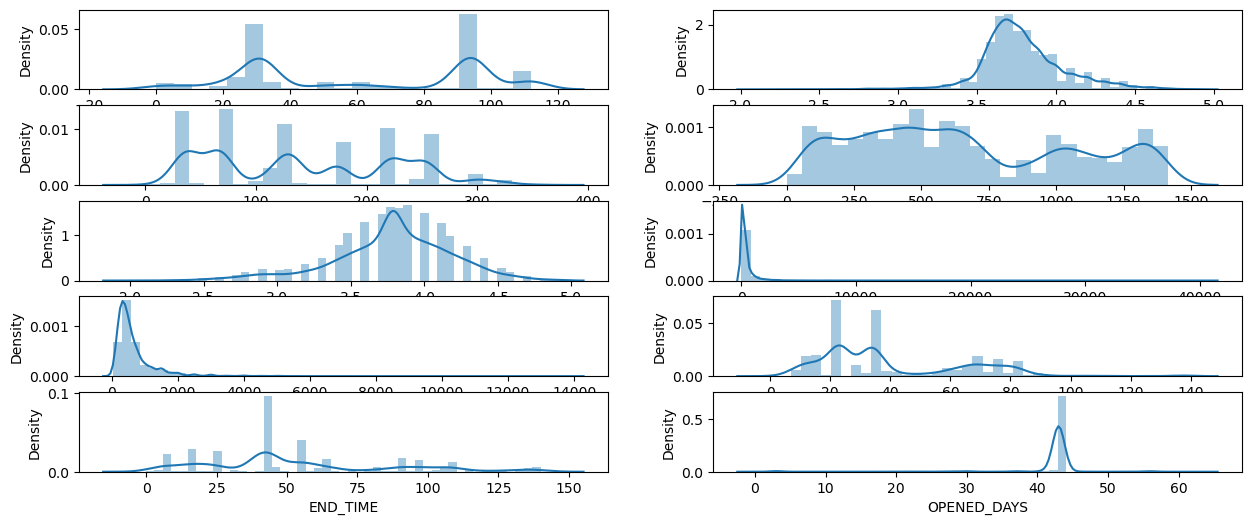

In [108]:
#visualigation of the dataset
plt.figure(figsize=(15,6))
plotnumber=1
for i in data_train:
    plt.subplot(5,2,plotnumber)
    sns.distplot(data_train[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

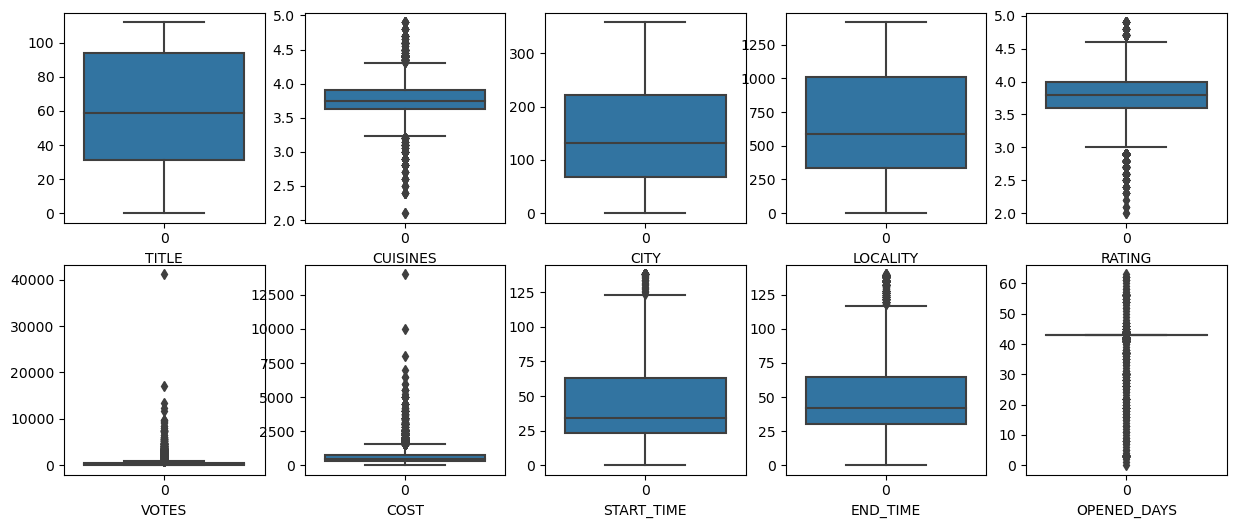

In [109]:
#let us plot the boxplot to see other things and outliers
#visualigation of the dataset
plt.figure(figsize=(15,6))
plotnumber=1
for i in data_train:
    plt.subplot(2,5,plotnumber)
    sns.boxplot(data_train[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [110]:
#there are ouliers and we are only concerned about the continous data so we will use just the rating and the votes to remove
from scipy.stats import zscore
#the continou columns are only two which are the votes and the rating apart from the cost which is the label

In [111]:
continous_columns=['RATING', 'VOTES']

In [112]:
Zscore=np.abs(zscore(data_train[continous_columns]))
Zscore_test=np.abs(zscore(data_test[continous_columns]))

In [113]:
index=np.where(Zscore>3)
index_test=np.where(Zscore>3) #the indexes of the test and train dataset 

In [114]:
data_train.drop(index=index[0],inplace=True)

In [115]:
data_train=data_train.reset_index(drop=True)

In [117]:
Zscore_test=np.abs(zscore(data_test[continous_columns]))

In [118]:
index_test=np.where(Zscore_test>3)

In [119]:
data_test.drop(index=index_test[0],inplace=True)

In [120]:
data_test.reset_index(drop=True,inplace=True)

In [121]:
#Hence we have succesfully completed all the  outliers detection
#Now let us compare the data feature relation

In [122]:
data_train.describe()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,START_TIME,END_TIME,OPENED_DAYS
count,12422.000000,12422.000000,12422.000000,12422.000000,12422.000000,12422.000000,12422.00000,12422.000000,12422.000000,12422.000000
mean,61.334165,3.781782,142.210031,661.229834,3.784566,349.374928,646.18427,40.140155,53.459829,42.173644
std,34.745783,0.255687,83.815357,404.418502,0.385307,439.401386,623.22395,24.326929,33.658554,5.512276
min,0.000000,2.600000,0.000000,0.000000,2.600000,4.000000,20.00000,0.000000,0.000000,0.000000
25%,31.000000,3.625871,67.000000,337.000000,3.600000,62.000000,300.00000,23.000000,27.000000,43.000000
50%,60.000000,3.747684,131.000000,590.000000,3.800000,195.000000,450.00000,34.000000,42.000000,43.000000
75%,94.000000,3.900000,222.000000,1014.750000,4.000000,415.668901,750.00000,63.000000,65.000000,43.000000
max,112.000000,4.900000,358.000000,1416.000000,4.900000,2811.000000,14000.00000,138.000000,140.000000,63.000000


In [123]:
corr=data_train.corr()

<Axes: >

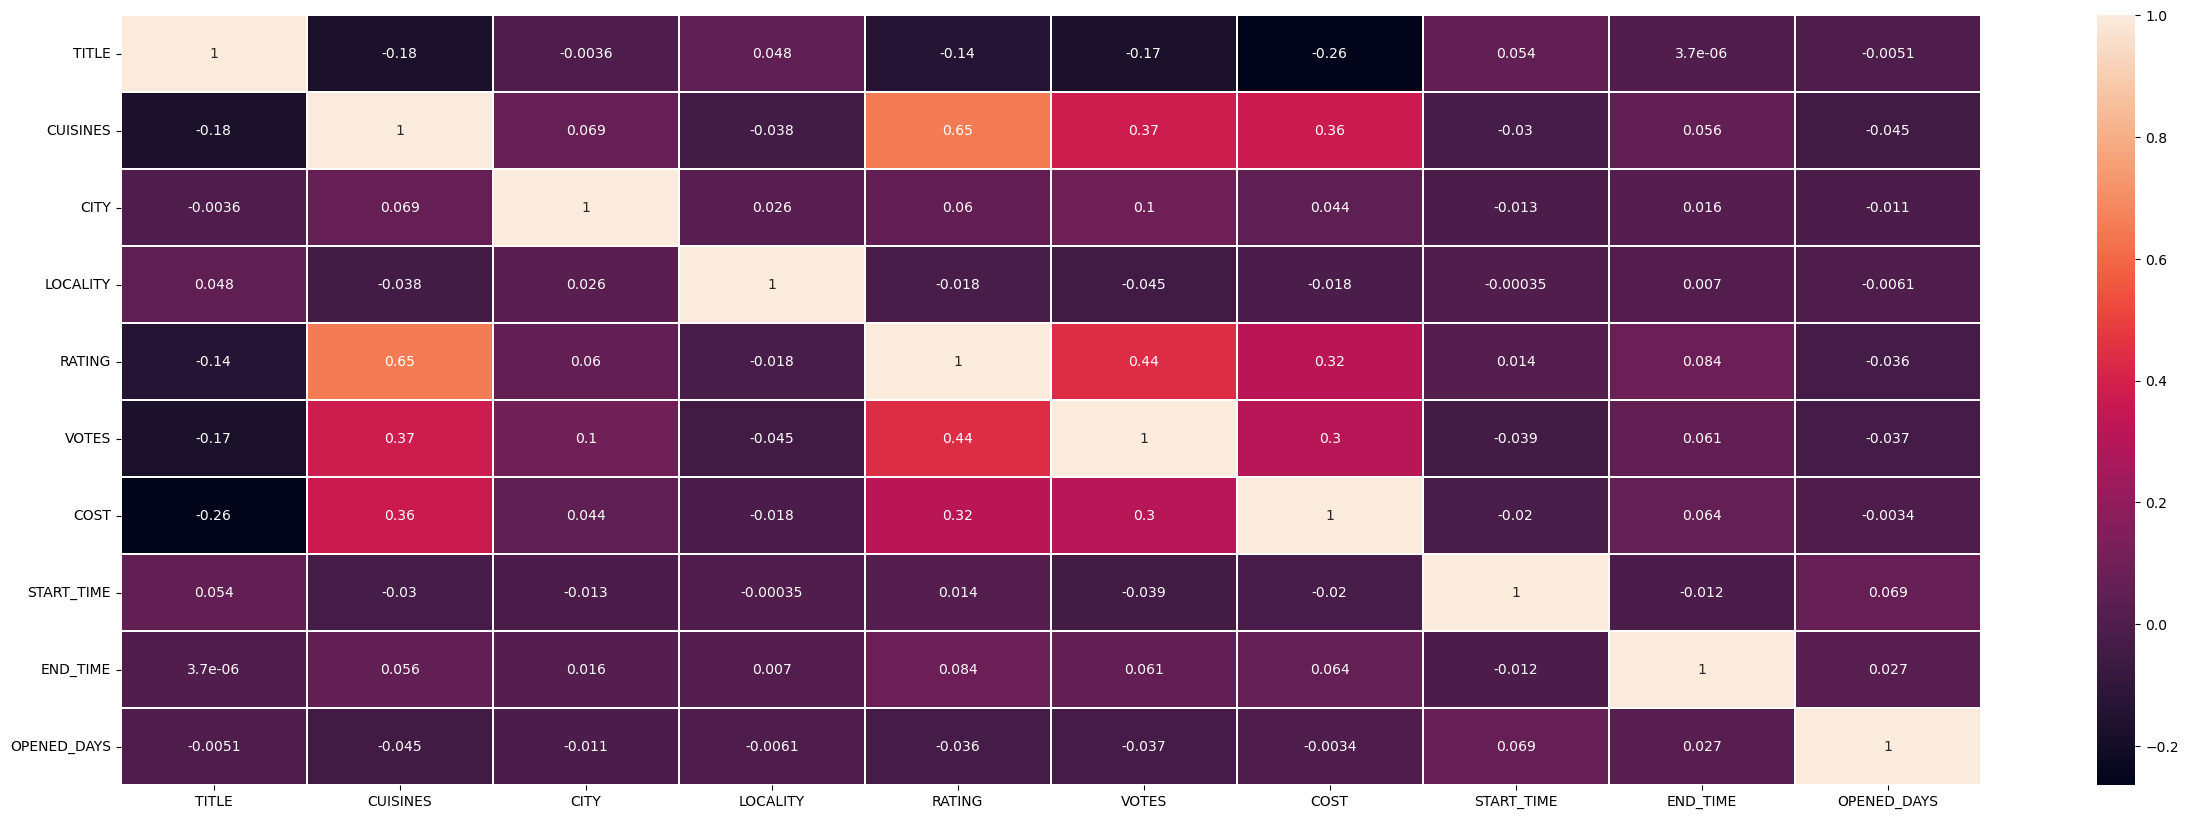

In [124]:
plt.figure(figsize=(30,10))
sns.heatmap(corr,annot=True,linewidths=0.1)

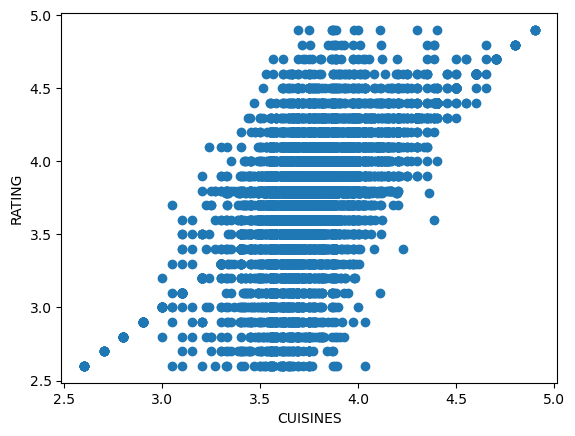

In [125]:
#we were concerned about the cuisines and the the rating being coorelated which we can see here
#now let us plot a scatte plot to see
plt.scatter(x='CUISINES',y='RATING',data=data_train)
plt.xlabel('CUISINES')
plt.ylabel('RATING')
plt.show()

In [126]:
#There is a relation but not that much that we should delete this

In [127]:
corr['COST'].sort_values(ascending=False)
#all the values are very much related to the label

COST           1.000000
CUISINES       0.362886
RATING         0.317812
VOTES          0.303430
END_TIME       0.063669
CITY           0.044333
OPENED_DAYS   -0.003435
LOCALITY      -0.017664
START_TIME    -0.019902
TITLE         -0.264775
Name: COST, dtype: float64

In [128]:
#dividing the dataset into feature and label
x=data_train.drop(columns='COST')
y=data_train['COST']

In [129]:
#Apply standardscaler on the data to standardize the feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [130]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,START_TIME,END_TIME,OPENED_DAYS
0,-0.873067,-0.710985,2.121295,-0.930336,-0.479031,-0.683628,-0.704604,1.620461,0.149918
1,-0.815503,1.635731,-0.897366,0.951454,1.078233,-0.726870,0.980839,-0.340487,0.149918
2,-0.873067,0.462373,-0.897366,1.087457,0.040057,-0.292170,-0.704604,1.085657,0.149918
3,0.940176,1.114238,0.952011,-1.298781,0.818689,-0.740526,-0.992362,0.342874,0.149918
4,-0.326216,0.344667,0.952011,-0.101953,0.040057,-0.419622,-0.704604,0.342874,0.149918
...,...,...,...,...,...,...,...,...,...
12417,0.940176,0.071254,-0.133752,-0.789387,0.040057,0.447502,-0.252412,0.045761,-2.208549
12418,-0.815503,2.026850,0.952011,-1.306199,1.337777,1.967813,-0.252412,0.342874,-0.212923
12419,0.278198,0.853492,1.154846,1.683399,0.559145,0.588609,-0.252412,-0.251353,0.149918
12420,-0.873067,0.071254,-0.897366,-0.074752,-0.738575,-0.722318,0.939731,-1.320960,0.149918


In [131]:
x_test_scaled=scaler.fit_transform(data_test)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=data_test.columns)
x_test_scaled

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,START_TIME,END_TIME,OPENED_DAYS
0,-0.870408,-0.771552,1.339275,1.154615,-0.500536,0.486453,-0.405793,0.096303,0.153223
1,0.987778,1.673385,0.976881,-0.699043,1.049263,-0.670590,1.246654,-0.046104,0.153223
2,-0.870408,0.043427,0.976881,0.099585,0.016064,-0.005808,-0.690697,-0.758142,0.153223
3,1.388563,0.130602,-0.446813,0.288734,0.790964,2.513004,1.759482,-1.232833,-0.832073
4,0.987778,0.858406,0.510945,-0.366982,0.016064,-0.758001,-0.690697,-1.232833,0.153223
...,...,...,...,...,...,...,...,...,...
4133,-0.870408,0.249417,1.287505,0.881400,-0.017024,-0.150726,-0.861640,-0.758142,0.153223
4134,1.388563,-0.186417,-1.275144,-0.631790,-0.242236,0.267926,-0.690697,0.333649,0.153223
4135,0.987778,0.684970,-0.446813,1.297527,0.790964,-0.688992,1.645520,-1.470179,0.153223
4136,0.987778,0.450916,0.510945,-0.232476,0.274364,0.177685,-0.690697,-0.758142,-2.063692


In [132]:
#Now let us check the variance inflation factor of each the column
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
for i in range(7):
    print(variance_inflation_factor(x_scaled,i))

1.0511401884775846
1.7938880880490213
1.0132183385742808
1.0055089316727788
1.8970071166195923
1.2898681925262294
1.011992594559937


In [134]:
#no issue with the data let us move to the model phase

In [341]:
#so from the variance inflation score it is cleat that we do not need to remove any of the columns
#And there is no multicollineaity problem in the features so we can proceed further

In [139]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [136]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.23201759731224092 65


In [137]:
#so the max accuracy is 0.96 and best random state is 72
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=maxrs)

In [141]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()
knn=KNeighborsClassifier()
ds=DecisionTreeClassifier()

In [142]:
models=[rr,er,lr,gb,ad,bg,ri,ls,knn,ds]

In [143]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
print(accuracy)

{RandomForestRegressor(): 0.7289782408689995, ExtraTreesRegressor(): 0.7193049523917947, LinearRegression(): 0.2202534195415391, GradientBoostingRegressor(): 0.7107685893019615, AdaBoostRegressor(): -0.6260912600347748, BaggingRegressor(): 0.7081174945968594, Ridge(): 0.22025308330117288, LassoCV(): 0.22098492789565138, KNeighborsClassifier(): 0.11824529570418052, DecisionTreeClassifier(): 0.3811972136158014}


In [144]:
#so as of now randomforest has the best accuracy
#Let us see what happens after cross validation
from sklearn.model_selection import cross_val_score

In [145]:
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=5).mean())

RandomForestRegressor() , 0.7089076046179763
ExtraTreesRegressor() , 0.7058013964256171
LinearRegression() , 0.20436143967321505
GradientBoostingRegressor() , 0.6969504500362202
AdaBoostRegressor() , -0.6141138719770277
BaggingRegressor() , 0.6844000825334093
Ridge() , 0.20436147195770332
LassoCV() , 0.20430622875930537
KNeighborsClassifier() , 0.11632587797315293
DecisionTreeClassifier() , 0.12622796359477315


In [146]:
#We can clearly see the dominance of Randomforest so we will proceed with this fornhyoerparamter tuning

In [147]:
model=RandomForestRegressor()

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [150]:
grid_search=GridSearchCV(model,param_grid,cv=5)

In [151]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [153]:
print(grid_search.best_estimator_,grid_search.best_score_)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=200) 0.6883532825850143


In [154]:
#let us make the final model
model=RandomForestRegressor(bootstrap=False,max_depth=20,max_features='sqrt',min_samples_leaf=2,n_estimators=200)

In [155]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=200)

In [156]:
#let us evaluate the prediction of the model
pred=model.predict(x_test)
r2_score(y_test,pred)

0.7169962575799721

In [157]:
#SO the r2 score for the model is 0.71 so now let us just predict the test dataset

In [158]:
#The point to note is that we did not had the label with the test dataset so we build and choosed the best model using the trainng dataset only

In [160]:
Predicted_values=model.predict(x_test_scaled)

In [161]:
#Predicted values
Predicted_values=pd.Series(Predicted_values,name='Test dataset Prediction')
Predicted_values

0       711.105839
1       406.729167
2       656.340939
3       333.266667
4       424.079762
           ...    
4133    681.101191
4134    443.490055
4135    381.665952
4136    434.690037
4137    323.876455
Name: Test dataset Prediction, Length: 4138, dtype: float64

In [162]:
#Conclusion
#The random forest had the best r2 score before and after cross validation
#We predicted the final test dataset predcition using the random forest 
#Thanks